# Flight Fare Prediction

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [4]:
train_data = pd.read_excel('Data_train.xlsx')

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [8]:
train_data.shape

(10683, 11)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data.dropna(inplace = True)

In [11]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
train_data.shape

(10682, 11)

## EDA

In the dataset the Date_of_Journey is in object datatype, so we have to convert that into timestamp to use the feature properly for the prediction

For this we need pandas <b>to datetime</b> to convert object datetype into timestamp.

<b><font color = blue>.dt.day method will extract only day of that date.

.dt.month method will extract only month of that date.</font>

In [13]:
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.day

In [14]:
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [15]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [16]:
train_data.drop(['Date_of_Journey'], axis = 1, inplace = True)

In [17]:
# Similarly we can extract values from Dep_Time

# Extracting hours
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour

# Extracting minutes
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

# Now dropping Dep_time
train_data.drop(['Dep_Time'], axis = 1, inplace = True)

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [19]:
# Similarly we can extract values from Arrival_Time

# Extracting hours
train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour

# Extracting minutes
train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

# Now dropping Arrival_time
train_data.drop(['Arrival_Time'], axis = 1, inplace = True)

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [21]:
# Duration means difference between arrival time and departure time

# Assigning and converting Duration column into a list
duration = list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:     # Check if duration contains only hours or minutes
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'     # Adds 0 minute
        else:
            duration[i] = '0h ' + duration[i]     #Adds 0 hour
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))  # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1]))  # Extract mins from duration

In [22]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data['Duration_hours'] = duration_hours
train_data['Duration_mins'] = duration_mins

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [24]:
train_data.drop(['Duration'], axis = 1, inplace = True)

In [25]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling Categorical Data

We can handle Categorical Data in many ways. Some of them are:

1. <b>Nominal Data</b>: Data which is not in any order --> <b>One Hot Encoder</b> is used
2. <b>Ordinal Data</b>: Data which is in an order --> <b>label Encoder</b> is used

In [26]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

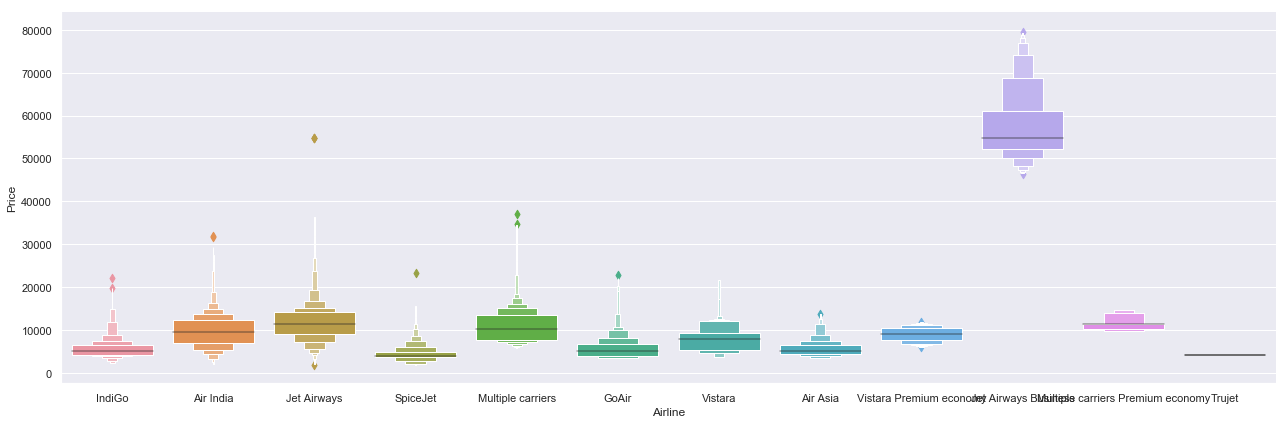

In [27]:
# Airline vs Price
sns.catplot(x = 'Airline', y = 'Price', data = train_data, kind = 'boxen', height = 6, aspect = 3)
plt.show()

In [28]:
# As Airline is a Nomimal Categorical Data, we will do OneHotEncoding

Airline = train_data[['Airline']]

Airline = pd.get_dummies(Airline, drop_first=True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [29]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

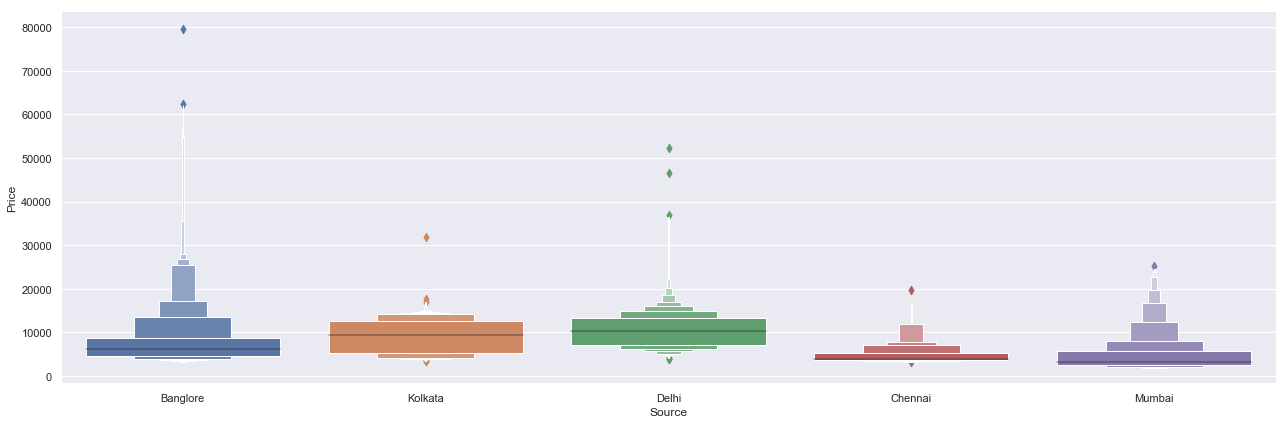

In [30]:
 # Source vs Price
sns.catplot(x = 'Source', y = 'Price', data = train_data, kind = 'boxen', height = 6, aspect = 3)
plt.show()    

In [31]:
# As Source is a Nomimal Categorical Data, we will do OneHotEncoding

Source = train_data[['Source']]

Source = pd.get_dummies(Source, drop_first=True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [32]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [33]:
# As Destination is a Nomimal Categorical Data, we will do OneHotEncoding

Destination = train_data[['Destination']]

Destination = pd.get_dummies(Destination, drop_first=True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [34]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
5                    CCU → BLR
6              BLR → BOM → DEL
7              BLR → BOM → DEL
8              BLR → BOM → DEL
9              DEL → BOM → COK
10             DEL → BLR → COK
11                   CCU → BLR
12                   MAA → CCU
13             CCU → BOM → BLR
14                   CCU → BLR
15       DEL → AMD → BOM → COK
16             DEL → PNQ → COK
17             DEL → BOM → COK
18       DEL → CCU → BOM → COK
19             DEL → BOM → COK
20             DEL → BOM → COK
21             BLR → COK → DEL
22                   BLR → DEL
23                   BLR → DEL
24             CCU → BOM → BLR
25       DEL → IDR → BOM → COK
26             DEL → LKO → COK
27             DEL → BOM → COK
28                   BLR → DEL
29                   MAA → CCU
                 ...          
10653          CCU → BOM → BLR
10654   

In [35]:
# Addiional_Info contais almost 'no_info' values
# Route and Total_Stops are related to each other

train_data.drop(['Additional_Info', 'Route'], axis = 1, inplace = True)

In [36]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [37]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [38]:
# Total_Stops is an ordinal categrorical attribute, therefore LabelEncoding should be done
# Here, the values are assigned with corresponding keys

train_data.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace = True)

In [39]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [40]:
# Concatinating dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [41]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [42]:
data_train.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [43]:
data_train.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True)

In [44]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [45]:
data_train.shape

(10682, 30)

# Test Data

In [46]:
test_data = pd.read_excel('Test_set.xlsx')

In [47]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


## Preprocessing

### (Same as we did on Training set)

In [48]:
print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

print()

# EDA

# Extracting days and months from Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data['Date_of_Journey'], format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Extracting hour and minutes from Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Extracting hour and minutes from Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Extracting hours and minutes from Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 'no_info' values
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenating dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Airline
------------------------------

In [49]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Feature Selection

#### Finding out the best feature which will have a good relation with the target variable.
#### Some feature selection methods are as follows:
<b><font color = green>
1. HeatMap
2. feature_importances_
3. SelectKBest

In [50]:
data_train.shape

(10682, 30)

In [51]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [52]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [53]:
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [54]:
X.shape

(10682, 29)

In [55]:
y = data_train.loc[:, 'Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

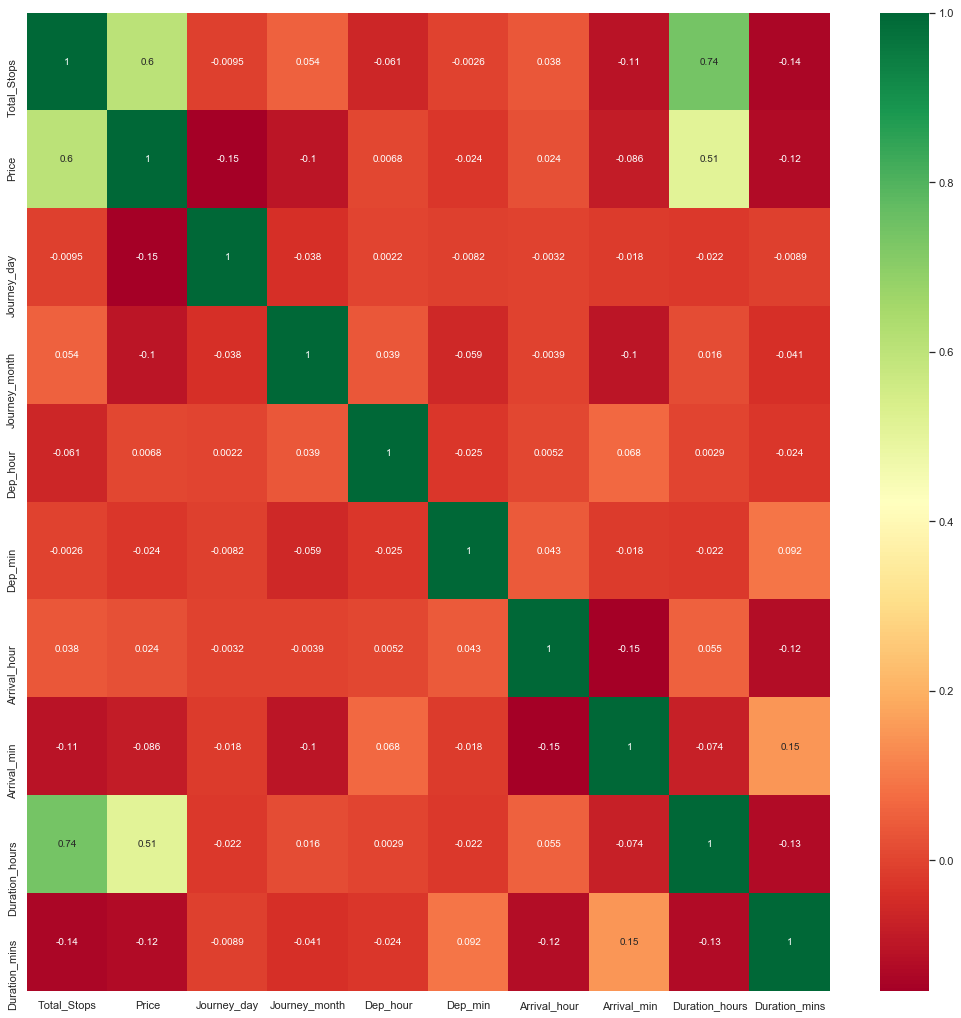

In [56]:
# Finding correlation between Independent and dependent attributes

plt.figure(figsize = (18, 18))
sns.heatmap(train_data.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

In [57]:
# Fetching important features using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [58]:
print(selection.feature_importances_)

[2.47137735e-01 1.43257565e-01 5.32990792e-02 2.38895530e-02
 2.11132611e-02 2.84892682e-02 1.92542386e-02 9.96041744e-02
 1.75751677e-02 9.81245038e-03 1.86104581e-03 1.81224266e-02
 1.37395213e-01 6.76827051e-02 1.89739450e-02 9.01039734e-04
 3.02381795e-03 1.13632833e-04 5.09037749e-03 9.46611419e-05
 5.20116410e-04 7.72991355e-03 3.31046001e-03 6.77748469e-03
 1.46920453e-02 1.87166686e-02 6.24554738e-03 5.03390435e-04
 2.48130157e-02]


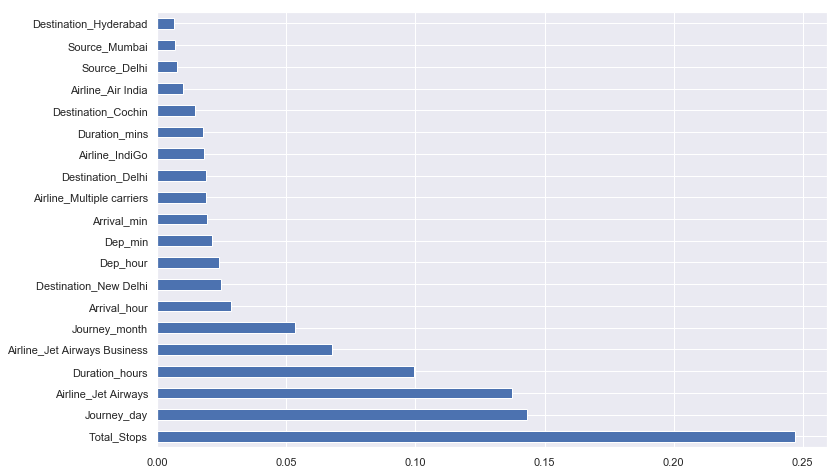

In [59]:
# plot a graph of feature importances

plt.figure(figsize = (12, 8))
feat_importances = pd.Series(selection.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind = 'barh')

plt.show()

  # Fitting model 

#### Splitting the dataset

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#### Importing RandomForestRegressor and fitting the train data

In [61]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [62]:
y_pred = reg_rf.predict(X_test)

In [63]:
reg_rf.score(X_train, y_train)

0.9554147411167238

In [64]:
reg_rf.score(X_test, y_test)

0.8047977910603352

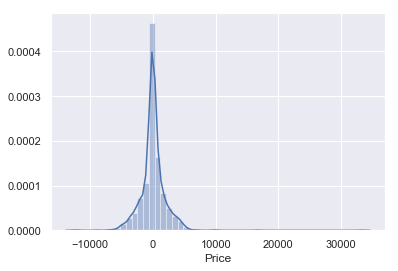

In [65]:
sns.distplot(y_test - y_pred)
plt.show()

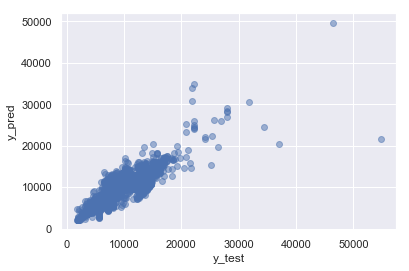

In [66]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [68]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Square Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  1215.2423818558605
Mean Square Error:  4003732.0747486553
Root Mean Absolute Error:  2000.9328011576638


In [69]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8047977910603352

# Hyperparameter Tuning using RandomizedSearchCV

In [70]:
from sklearn.model_selection import RandomizedSearchCV

In [71]:
# Randomized Search CV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [72]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [73]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state = 1, n_jobs = 1)

# cv = 5 means 5 fold cross validation(dataset is divided into 5 parts and shuffles them as test and train data randomly)
# n_iter means number of iterations
# n_jobs means jobs running in parallel (n_jobs = 1 means 1 processor working)

In [74]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_depth=15, max_features=auto, n_estimators=600, min_samples_leaf=2, min_samples_split=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=15, max_features=auto, n_estimators=600, min_samples_leaf=2, min_samples_split=15, total=   8.7s
[CV] max_depth=15, max_features=auto, n_estimators=600, min_samples_leaf=2, min_samples_split=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s


[CV]  max_depth=15, max_features=auto, n_estimators=600, min_samples_leaf=2, min_samples_split=15, total=   8.5s
[CV] max_depth=15, max_features=auto, n_estimators=600, min_samples_leaf=2, min_samples_split=15 
[CV]  max_depth=15, max_features=auto, n_estimators=600, min_samples_leaf=2, min_samples_split=15, total=  12.2s
[CV] max_depth=15, max_features=auto, n_estimators=600, min_samples_leaf=2, min_samples_split=15 
[CV]  max_depth=15, max_features=auto, n_estimators=600, min_samples_leaf=2, min_samples_split=15, total=  11.5s
[CV] max_depth=15, max_features=auto, n_estimators=600, min_samples_leaf=2, min_samples_split=15 
[CV]  max_depth=15, max_features=auto, n_estimators=600, min_samples_leaf=2, min_samples_split=15, total=  10.9s
[CV] max_depth=5, max_features=auto, n_estimators=800, min_samples_leaf=10, min_samples_split=100 
[CV]  max_depth=5, max_features=auto, n_estimators=800, min_samples_leaf=10, min_samples_split=100, total=   8.5s
[CV] max_depth=5, max_features=auto, n_es

[CV]  max_depth=30, max_features=sqrt, n_estimators=200, min_samples_leaf=5, min_samples_split=15, total=   2.2s
[CV] max_depth=30, max_features=sqrt, n_estimators=200, min_samples_leaf=5, min_samples_split=15 
[CV]  max_depth=30, max_features=sqrt, n_estimators=200, min_samples_leaf=5, min_samples_split=15, total=   1.7s
[CV] max_depth=30, max_features=sqrt, n_estimators=200, min_samples_leaf=5, min_samples_split=15 
[CV]  max_depth=30, max_features=sqrt, n_estimators=200, min_samples_leaf=5, min_samples_split=15, total=   1.7s
[CV] max_depth=30, max_features=sqrt, n_estimators=200, min_samples_leaf=5, min_samples_split=15 
[CV]  max_depth=30, max_features=sqrt, n_estimators=200, min_samples_leaf=5, min_samples_split=15, total=   1.8s
[CV] max_depth=30, max_features=auto, n_estimators=100, min_samples_leaf=5, min_samples_split=15 
[CV]  max_depth=30, max_features=auto, n_estimators=100, min_samples_leaf=5, min_samples_split=15, total=   2.2s
[CV] max_depth=30, max_features=auto, n_est

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [75]:
rf_random.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [76]:
prediction = rf_random.predict(X_test)

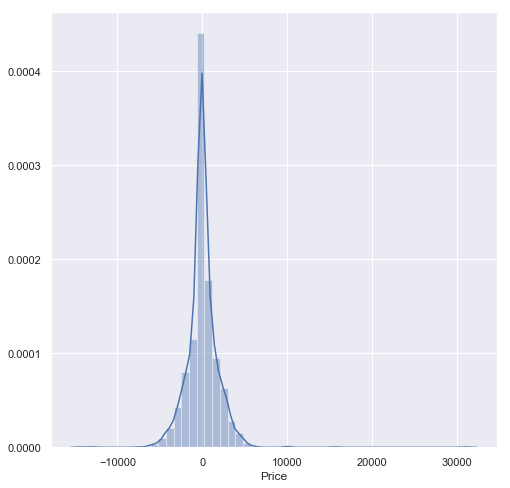

In [77]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

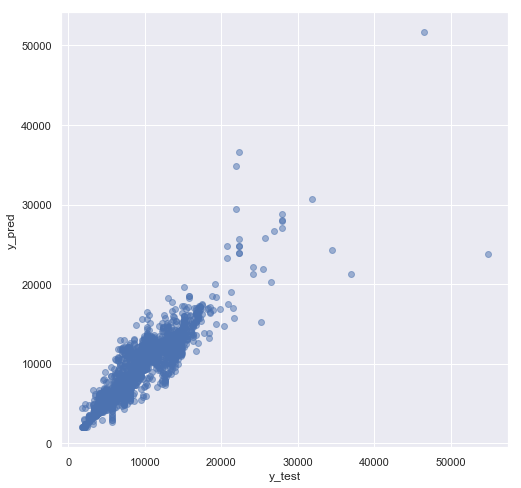

In [78]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [79]:
print('Mean Absolute Error:', mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', mean_squared_error(y_test, prediction))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, prediction)))

Mean Absolute Error: 1175.380977492748
Mean Squared Error: 3548412.0472118324
Root Mean Squared Error: 1883.722922091206


In [80]:
print(r2_score(y_test, prediction))

0.8269969476198401


# Save the model to reuse it again

In [81]:
import pickle

# open the file where you want to store the data
file = open('flight_random_forest.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [82]:
model = open('flight_random_forest.pkl', 'rb')
forest = pickle.load(model)

In [83]:
y_prediction = forest.predict(X_test)

In [84]:
print(r2_score(y_test, y_prediction))

0.8269969476198401


In [89]:
# prediction2 = forest.predict([[
#             Total_stops,
#             Journey_day,
#             Journey_month,
#             Dep_hour,
#             Dep_min,
#             Arrival_hour,
#             Arrival_min,
#             dur_hour,
#             dur_min,
#             Air_India,
#             GoAir,
#             IndiGo,
#             Jet_Airways,
#             Jet_Airways_Business,
#             Multiple_carriers,
#             Multiple_carriers_Premium_economy,
#             SpiceJet,
#             Trujet,
#             Vistara,
#             Vistara_Premium_economy,
#             s_Chennai,
#             s_Delhi,
#             s_Kolkata,
#             s_Mumbai,
#             d_Cochin,
#             d_Delhi,
#             d_Hyderabad,
#             d_Kolkata,
#             d_New_Delhi
#         ]])

In [86]:
X_test

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
7930,0,9,4,21,5,23,55,2,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8033,1,6,6,20,25,23,35,27,10,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8617,1,6,6,17,0,23,35,6,35,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3836,1,18,3,22,50,9,0,10,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8636,1,27,6,7,35,16,10,8,35,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3035,1,24,6,11,30,19,15,7,45,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2785,0,12,4,13,20,16,10,2,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4228,1,21,3,4,45,12,35,7,50,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
9740,1,1,5,20,20,20,20,24,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5814,1,18,3,21,25,9,0,11,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [87]:
prediction2 = forest.predict([[
            0, 4,9,21,5,23,55,2,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
        ]])

In [90]:
print(round(prediction2[0], 2))

6055.48
